표 2-4, 연령과 경구피임약의 복용 여부가 혈압에 미치는 영향 데이터

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

비율로 나온 데이터를 이렇게 처리하면 안되겠지만...
공부용이니 일단 넘어가자.

1% = 1명으로 처리했다.

In [61]:
blood_pressure = [90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165]
nottake25_34 = [1,1,5,11,11,17,18,11,9,7,4,2,2,1,0,0]
take25_34 = [0,0,4,5,10,15,17,13,12,10,5,4,2,1,1,0]

비복용자와 복용자는 얼마만큼 차이나는가?

In [15]:
# 25-34 비복용자의 평균 혈압
sum([i[0]*i[1] for i in list(zip(nottake25_34, blood_pressure))])/100

119.6

In [34]:
# 25-34 복용자 평균 혈압
sum([i[0]*i[1] for i in list(zip(take25_34, blood_pressure))])/99

123.43434343434343

평균적으로 3.8mm 만큼 혈압이 높게 측정되었다.

그런데 위 차이가 유의미할까?

그래프로 그려보자

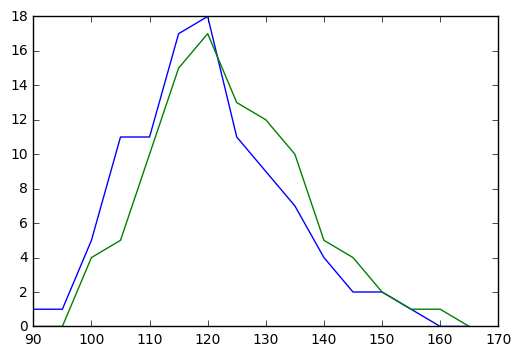

In [58]:
plt.plot(blood_pressure, nottake25_34)
plt.plot(blood_pressure, take25_34)
plt.show()

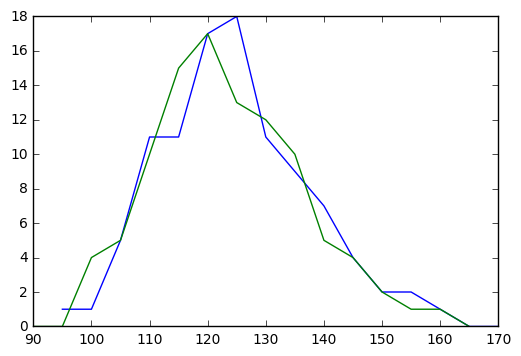

In [60]:
# 책에서 언급한데로, 비복용자에게 + 5를 하면 비슷해지는지 확인해보자
plt.plot([i+5 for i in blood_pressure], nottake25_34)
plt.plot(blood_pressure, take25_34)
plt.show()

비슷하게 보인다. 

눈으로 어림짐작(?)하건데 두 데이터가 정규분포를 그리고 있다.

그런데 책에서 언급한데로, 5mm정도 상승했다고 결론을 지을 수 있을까? 우연이 아닐까?

그렇다면 Z검정을 통해 차이가 유의미한지 구할 수 있지 않을까. 가설부터 세워보자.

```
귀무가설: 복용자와 비복용자에게 혈압 차이가 없다.
대립가설: 복용자와 비복용자에게 혈압 차이가 있다.
```

In [62]:
# 1%를 1명으로 해서 데이터를 정렬해보자.
nottake25_34_raw = []
for data in [[i[1]] * i[0] for i in list(zip(nottake25_34, blood_pressure))]:
    nottake25_34_raw += data
take25_34_raw = []
for data in [[i[1]] * i[0] for i in list(zip(take25_34, blood_pressure))]:
    take25_34_raw += data

In [63]:
print('비복용자의 평균: {0}'.format(np.mean(nottake25_34_raw)))
print('비복용자의 표준편차: {0}'.format(np.std(nottake25_34_raw)))
print('복용자의 평균: {0}'.format(np.mean(take25_34_raw)))
print('복용자의 표준편차: {0}'.format(np.std(take25_34_raw)))

비복용자의 평균: 119.6
비복용자의 표준편차: 12.70196835140129
복용자의 평균: 123.43434343434343
복용자의 표준편차: 12.646045108734741


In [135]:
z_statistic = (np.mean(take25_34_raw) - np.mean(nottake25_34_raw)) / (((np.std(take25_34_raw)**2)*len(take25_34_raw))**0.5)
print('z-통계량: {0}'.format(z_statistic))

z-통계량: 0.03047324373012298


In [136]:
print('p-value: {0}'.format(st.norm.sf(z_statistic)))

p-value: 0.48784481593915247


p-value가 0.48로 나왔으므로 대립가설을 기각할 수 있다.

풀어서 적어보자면, 비복용자의 수치 값들이나 복용자의 수치 값들이 큰 차이를 보이지 않는다는 말이다. 만약 비복용자의 평균 값을 진리 값(모수)이라고 가정한다면, 복용자의 평균 값은 약 48%의 가능성으로 나올 수 있다는 말이다.

따라서 평균 값으로만 비교를 해보면 복용자와 비복용자 간의 차이가 있는 듯 보이지만, 서로 간의 편차를 고려하여 우연일 가능성을 점쳐본다면 우연히 높게 나왔을 가능성이 높다.